# An introduction

You are currently looking at a Google Colab (AKA Jupyter Lab) notebook. This is a document that - among many other things - allows you to combine Python code, code output, and Markdown (formatted text) into a single file. For our purposes here, we're using Google Colab to explore key spaces, hashing algorithms, and Rainbow tables.  
You're free to edit the code below, but be sure you have a copy of this original document somewhere in case you need to back out any changes you make.

## Tips and tricks before you start

### You can ignore the code (mostly)!

The Python code in this notebook is there to be read and modified, but, it's also fine to just ignore it altogether. The interactive widgets and accompanying text are still relevant and (hopefully) interesting on their own.  

***However!*** You do still need to execute the code, which is explained in the very next section.

### Jupyter cells and executing code

Everything in a Jupyter notebook happens in a "cell." When a cell contains code or Markdown that needs to be rendered (just two examples), you can execute that code by clicking the cell you wish to run, then typing "Shift+Enter".  
In Google Colab, an alternative is to click the little Play button that shows up when you mouse over the left side of the cell:


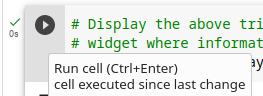

Give it a try in the next cell! Click the cell, then on your keyboard press: Shift+Enter

In [ ]:
print("It's a Python print statement!")

### Navigating notebook sections
This notebook is broken into sections. You can see and navigate between the sections by clicking the "Table of Contents" button on the left-hand side of your browser window:

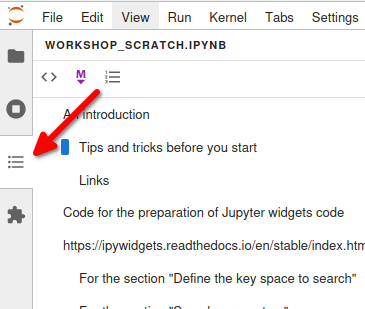

### Hiding sections and code

Things can get a little cluttered in notebooks as you deal with code, Markdown, and code output.  
***To hide an entire notebook section:*** Move your mouse to the left of a heading to reveal with "down arrow thingy," and click that.


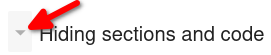

***To hide code or code output***
*Whoops. Google Colab doesn't let you hide cells like Jupyter Lab does.*

## Links
* [Jupyter](https://jupyter.org/)
* [Wikipedia explanation](https://en.wikipedia.org/wiki/Project_Jupyter) of "Project Jupyter"
* [Jupyter Lab](https://jupyterlab.readthedocs.io/en/stable/)
* [Google Colab](https://colab.research.google.com/) (A Google-hosted, slightly modified version of Jupyter Lab)

# Code for the preparation of Jupyter widgets 

The Python code in this section ("Code for the preperation of Jupyter widgets") prepares *Jupyter widgets* for use in later sections of the notebook.  

*Jupyter Widgets* are a feature of Jupyter that allows for limited interactivity. They allow us to manipulate aspects of our Python code using familiar web page features like text boxes.  

*See:* https://ipywidgets.readthedocs.io/en/stable/index.html

In [ ]:
# We import the Jupyter widgets module "ipywidgets," then specify that we will
# be referencing this module by the name "widgets."
#
# Because we'll be using Jupyter widgets throughout this notebook, we import
# the module at the top.
import ipywidgets as widgets

## For the section "Define the key space to search"

In [ ]:
# A function in this cell uses constants from Python's 'string' module. Unlike
# the import statement we used for 'ipywidgets', above, we're not giving
# the 'string' module any other name; we'll refer to the contents of this
# module using "string."
import string


###########################################################
# Functions to help process user "key space search" input #
###########################################################

# This is a Python function used as a "callback" for responding when the user
# clicks the "Set key space" button, below. It's called a "callback" because
# when that button is pressed this function is "called back to" to perform the
# desired action.
#
# In the case here, that desired action is to print information about the key
# space, as entered by the user.
def defineKeySpace_callback(maxKeyLength, allowable_chars, output_widget):
    # Take the "nice to look at" allowable characters passed to this function
    # and expand them into an equivalent "nice for Python to work with" list
    expanded_allowable_chars = expand_allowable_chars(allowable_chars)
    
    # Clear all text that exists in the 'output' widget area (the area where
    # we print send output for the "Define the key space to search" section).
    output_widget.clear_output()
    
    # Inside the "Define the key space to search" section, do the following...
    with output_widget:
        # Calculate the total key space size - All keys of `maxKeyLength`,
        # consisting of 'expanded_allowable_chars'
        keyspace_size = len(expanded_allowable_chars)**maxKeyLength
        print('Key size:', maxKeyLength)
        print('Number of allowable characters:',
              len(expanded_allowable_chars))
        print('Size of resulting key space:', f'{keyspace_size:,}')


# The widget 'allowableCharacters_widget' takes on the values selected by the
# user. Those values are nice to look at for the user, but not as easy to work
# with in our code. This function takes the "nice to look at" allowable
# characters and turns it into an equivalent "nice for Python to work with"
# list.
def expand_allowable_chars(condensed_allowable_chars):
    # An empty list of the allowable characters, which we'll be adding to
    expanded_allowable_chars = list()
    
    # For each of the options the user could have selected for
    # 'allowableCharacters_widget'...
    for condensed_item in condensed_allowable_chars:
        # ... if they selected digits 0 through 9...
        if condensed_item[:3] == '0-9':
            # ... add to the 'expanded_allowable_chars' list the digits
            # 0 through 9
            expanded_allowable_chars.extend([str(i) for i in range(0,10)])
            
        # ... if they selected lowercase letters...
        elif condensed_item[:3] == 'a-z':
            # ... add to the 'expanded_allowable_chars' list all
            # lowercase letters
            expanded_allowable_chars.extend(string.ascii_lowercase)
        
        # ... if they selected uppercase letters...
        elif condensed_item[:3] == 'A-Z':
            # ... add to the 'expanded_allowable_chars' list all
            # uppercase letters
            expanded_allowable_chars.extend(string.ascii_uppercase)
            
        # ... if they selected "Special Characters" ...
        elif condensed_item[:7] == 'Special':
            # ... add to the 'expanded_allowable_chars' list what Python
            # refers to as "punctuation
            expanded_allowable_chars.extend(string.punctuation)
            
        # ... if they selected none of those things, then...
        else:
            print("Something has gone wrong...")

    # Return to the caller of this function the list we built of all
    # allowable characters the user selected
    return expanded_allowable_chars


####################
# Defining widgets #
####################
# Widgets for defining the key space

## An "output widget" is a place in the notebook where we can explicitly send
## output. This area is where we'll send information about the key space
## selected by the user.
keySpace_output_widget = widgets.Output(layout={'border': '1px solid black'})

## This widget will allow the user to select the maximum key length of keys in
## their key space. The default value is '3', and we'll only allow values
## between 1 and 5. Of course, this is easy to change!
maxKeyLength_widget = widgets.BoundedIntText(
    value=3,
    min=1,
    max=5)

## This widget will allow the user to select categories of allowable
## characters that will be allowed in their the key space. These four options
## will need to be translated into proper Lists that Python can easily work
## with (See the function 'expand_allowable_chars()')
allowableCharacters_widget = widgets.SelectMultiple(
    options=['0-9 (10 chars)',
             'a-z (26 chars)',
             'A-Z (26 chars)',
             'Special characters (32 chars)'])

## A button that the user will press once they've made their choices for the
## key space using the above two widgets.
setKeyspaceButton_widget = widgets.Button(description='Set key space')

## Set a callback function to handle provided information when "Set key space" 
## button pressed. This is where we specify that the function
## 'defineKeySpace_callback()' should be called when this button is pressed.
setKeyspaceButton_widget.on_click(lambda b:
                                  defineKeySpace_callback(
                                      maxKeyLength_widget.value,
                                      allowableCharacters_widget.value,
                                      keySpace_output_widget)
                                 )
    
# Setting up widget layout
## Below, we'll specify how the widgets we defined above should be laid out in
## the notebook.

## Create a vertical box that stacks a label and the 'maxKeyLength_widget' on
## top of one another. Together, this is where we ask about the desired key
## length for the key space being built.
keyLength_VBox = widgets.VBox([
    widgets.Label(value='What length of key would you like to search?'),
    maxKeyLength_widget
])

## Create a second vertical box, this time stacking a label and the
## 'allowableCharacters_widget' (created above) on top of one another.
## Together, these allow the user to select which characters will be allowed
## in the key space being built.
allowableCharacters_VBox = widgets.VBox([
    widgets.Label(value='Choose allowable characters for the key space'),
    allowableCharacters_widget
])

## Finally, we use a horizonal box widget (HBox) to place the two vertical
## boxes side-by-side. We then add a third column that will contain the button
## widget, 'setKeyspaceButton_widget', which we created previously.
keySpaceDisplay_HBox_widget = widgets.HBox([
    keyLength_VBox,
    allowableCharacters_VBox,
    setKeyspaceButton_widget
])

## Note! Even with all this layout work, none of the code above creates any
## output to screen yet.

## For the section "Search parameters"

In [ ]:
############################################################
# Functions to help process user "Search parameters" input #
############################################################

# Another callback function, this one for responding when the user presses the
# "Confirm key" button.
#
# This function will check whether the key the user wants to search for
# actually exists in the key space they defined.
def searchKeySpace_callback(search_key, maxKeyLength,
                            allowable_chars, output_widget):

    # As above - Take the "nice to look at" allowable characters passed to
    # this function and expand them into an equivalent "nice for Python to
    # work with" list
    expanded_allowable_chars = expand_allowable_chars(allowable_chars)
    
    # Clear all text that exists in the 'output' widget area (the area where
    # we print send output for the "Search parameters" section).
    output_widget.clear_output()
    
    # The function 'check_search_key()' is defined further below. It does
    # the actual work of verifying whether the target key we're looking for
    # will actually exist in the defined key space.
    #
    # 'check_search_key()' will generate output that is captured by
    # 'output_widget', but is also returns '-1' if it decides 'search_key'
    # won't be found in the key space, and '1' if it believes it will be found.
    searchKeyStatus = check_search_key(search_key,
                                       maxKeyLength,
                                       expanded_allowable_chars)
    
    # Exit callback function is 'check_search_key()' thinks we won't find the
    # target key in the key space. We don't need to tell the user what has
    # happened because 'check_search_key()' will have done that for us.
    if searchKeyStatus == -1:
        # A 'return' statement, used this way, bails out of the function right
        # away. So if this 'if' statement is entered, any subsequent code in
        # the function will not be executed.
        return
    
    # Lets find a key!
    output_widget.append_stdout("Lets find a key!")


####################
# Defining widgets #
####################
# Widgets for defining the search key (the key to be searched for)

## An "output widget" is a place in the notebook where we can explicitly send
## output. This area is where we'll send the results of examining the target
## key the user would like to find.
searchKey_output_widget = widgets.Output(layout={'border': '1px solid black'})

## This widget presents a text box where the user can enter the key they'd
## like to search the defined key space for.
searchKey_widget = widgets.Text(
    placeholder='Enter search key')

## A button that the user will press once they've supplied their target key to
## the above-defined text box.
searchKeyButton_widget = widgets.Button(description='Confirm key')

## Set a callback function to handle provided information when "Confirm key" 
## button pressed. This is where we specify that the function
## 'searchKeySpace_callback()' should be called when this button is pressed.
searchKeyButton_widget.on_click(lambda b:
                                  searchKeySpace_callback(
                                      searchKey_widget.value,
                                      maxKeyLength_widget.value,
                                      allowableCharacters_widget.value,
                                      searchKey_output_widget)
                                 )


# You've found the awkwardly placed function!

## Speaking in terms of Python code layout, it would have been nice if this
## function could have been placed alongside the other function above.
## However, as you can see, this function has what's called a "decorator":
## '@searchKey_output_widget.capture()'. The result is that this function
## needs to come *after* the definition of the widget
## 'searchKey_output_widget'. This is why this function is here.
##
## What's a decorator? It's a way that some programming languages can modify
## the way code behaves, and/or can provide extra information to developer
## tools without really changing how the code is written.
##
## What is this particular decorator? It's used by the 'Output' Jupyter widget
## to indicate that whatever output the "decorated" function produces should
## be captured and sent to the area referenced by the 'Output' object
## 'searchKey_output_widget'.
##
## Ok, but what does *this* function do? It's going to make sure that it's 
## actually possible to find the key user wants to search for.
@searchKey_output_widget.capture()
def check_search_key(search_key, keyspace_keylength, allowable_characters):
    # Keep track of whether we found an error while running through our search
    # key checks. This is used at the end of the function to either give the
    # A-OK, or return '-1' (not A-OK)
    found_error = False
    
    # Is the search key longer than the max length of keys in the defined key
    # space?
    if len(search_key) > keyspace_keylength:
        found_error = True
        print("The key you're searching for is longer than the keys " +
              "of the key space.")
    
    # Is the search key shorter?
    elif len(search_key) < keyspace_keylength:
        found_error = True
        print("The key you're searching for is shorter than the keys of the " +
              "key space.")
    
    # Go through each character that is the provided search key and make sure
    # each falls within the range of allowable characters.
    for c in search_key:
        if c not in allowable_characters:
            found_error = True
            print("Character found in search key that doesn't exist in " +
                  "allowable character list:", c)
            
            # 'break' doesn't quit the function like 'return' would, but it
            # will exit the loop that it's contained in (after finding one
            # character that's not allowed, lets just not bother to check the
            # rest)
            break
    
    
    if not found_error:
        print("You're good to go! This key should exist in your " +
              "defined key space!")
        return 1
    else:
        return -1


# Setting up widget layout

## Below, we'll specify how the widgets we defined above should be laid out in
## the notebook.

## Create a vertical box that stacks a label and the 'searchKey_widget' on top
## of one another. Add to the bottom of that the button
## 'searchKeyButton_widget'. Altogether, these will be used to allow the user
## to provide the key they wish to search their defined key space for.
searchKey_VBox = widgets.VBox([
    widgets.Label(value='What key would you like to search the key space for?'),
    searchKey_widget,
    searchKeyButton_widget
])

# Define the key space to search

In [ ]:
# Display two widgets that we defined above for allowing the user to define
# parameters for their desired key space.
display(keySpaceDisplay_HBox_widget, keySpace_output_widget)

In [ ]:
print(allowableCharacters_widget.value)
print(expand_allowable_chars(allowableCharacters_widget.value))

# Define the key to find in the key space

In [ ]:
# Display the two widgets that we defined above which allow the user to
# specify the key they'd like to search for in their defined key space.
display(searchKey_VBox, searchKey_output_widget)

# Search for your key in the defined key space

If you executed the code cells above, and defined a key space as well as a search key, you should now be ready to search for your provided key in the key space you defined.  
  
***What will happen when we run this search?***  
*Recall this slide:*

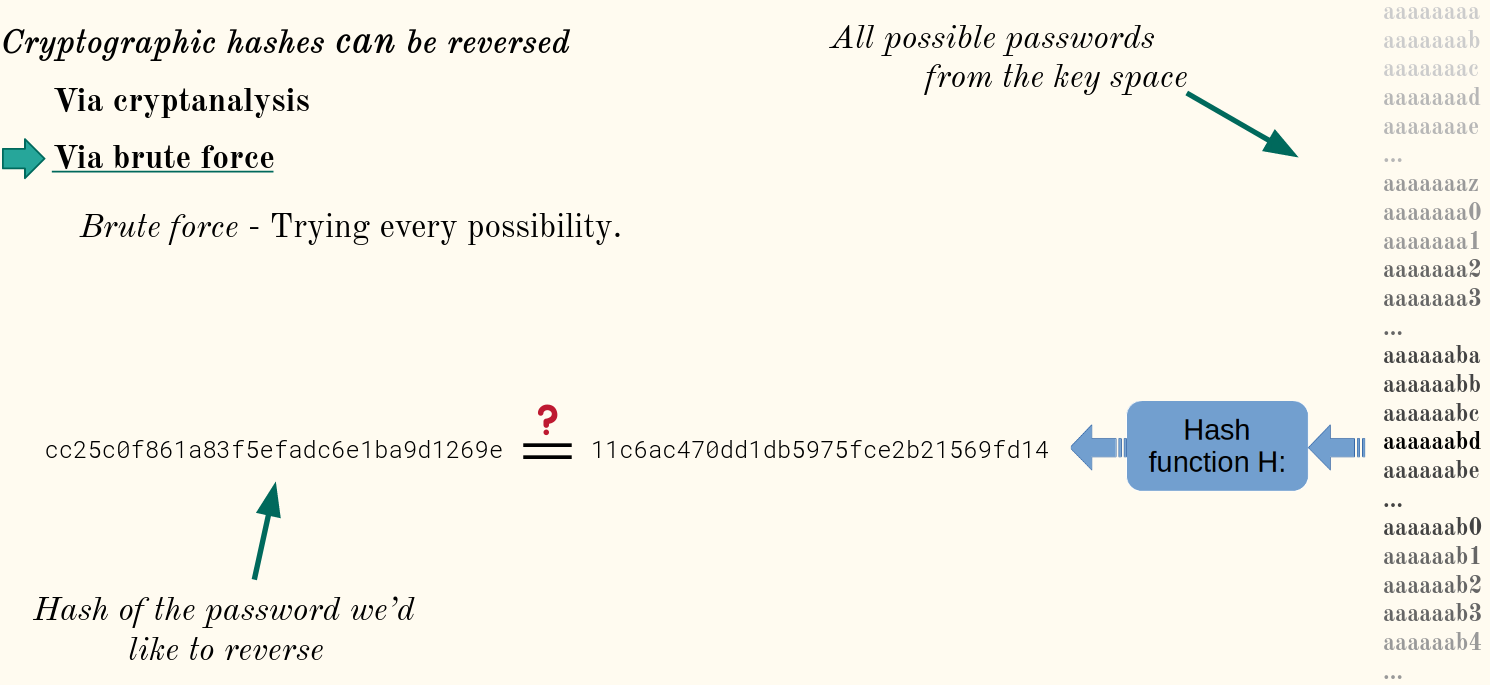

Similar to what's shown in this slide, the code below will systematically generate all possible passwords (keys) belonging to the key space you defined. It will compare the key you're searching for against each generated key, stopping only when a match is found. However, unlike in above slide, we haven't yet added the hashing function step.  

This is a "brute force" search.

## The search function

In [ ]:
iteration_print = int((len(allowable_characters)**maxKeyLength_widget.value)/10)
iteration_count = 0

# This is a recursive function, and recursive functions can be challenging to
# understand - both as a concept, and the code written in a recursive style.
#
# Function parameters:
# 'key_to_find' - The key the function is trying to match to the generated key
#                  produced.
#   'built_key' - A generated key, built up as it's passed from one call of
#                  'key_generate_and_search()' to the next. This is the first
#                  parameter necessary for this to be a recursive function.
#                  produced.
#   'allowable' - The list of characters allowed in the target key space. This
#                  is critical to producing keys *only* from the defined key
#                  space.
#    'position' - The number of key "positions" remaining for which characters
#                  must still be generated before a particular key from the
#                  key space has been completely built.
#                  This is the second necessary key that allows this to be a
#                  function to be recursive.
#
# Saying more about the 'position' parameter:
#  A four character password has four *positions* for which the function must
#  generate a single-character value.
#   __ __ __ __
#   4  3  2  1
#
# When the function 'key_generate_and_search()' is called with:
#    * 'position=4' - The function is generating *one* character for the fourth
#                      position (furthest to the left) of the key.
#    * 'position=3' - The function is generating *one* character for the third
#                      position of the key.
#    * ...
#    * 'position=1' - All previous calls to 'key_generate_and_search()' have
#                      been made, with each contributing a character to the
#                      'built_key' parameter. So this call assesses whether a
#                      matching key was produced.
#
# Here is how the hierarchy of function calls for
# 'key_generate_and_search(..., [], ..., 4)' would look (with 'x' being used
# as a placeholder for some key space character):
#
#    key_generate_and_search(..., [], ..., 4) -->
#      key_generate_and_search(..., [x], ..., 3) -->
#        key_generate_and_search(..., [x,x], ..., 2) -->
#          key_generate_and_search(..., [x,x,x], ..., 1) -->
#            key_generate_and_search(..., [x,x,x,x], ..., 0)
def key_generate_and_search(key_to_find, built_key, allowable, position):
    # This variable keeps track of how many keys from the key space we've
    # generated so far.
    iteration_count = 0

    # Loop through each allowed character in the key space.
    for c in allowable:
        # Ensure we haven't called this function for every key position
        if position > 1:
            # Call this function again, adding a new character, 'c', to the
            # in-progress key generation, and decrementing the 'position'
            # count of the key by 1
            if key_generate_and_search(key_to_find, built_key+c, 
                                       allowable, position-1) == True:
                return True
        
        # If 'position == 1' is true, then we're in the last position of the
        # generated key. We can now evaluate whether this key matches
        # 'key_to_find'
        elif position == 1:
            iteration_count = iteration_count+1
            if iteration_count % iteration_print == 0:
                print(built_key+c, " iteration", iteration_count)
            if key_to_find == built_key+c:
                print("Found your key,", built_key+c, "at iteration", iteration_count)
                print("Searched", float((iteration_count/(len(allowable_characters)**maxKeyLength_widget.value)*100)), 
                                        "before we found the key.")
                return True

            
allowable_characters = expand_allowable_chars(allowableCharacters_widget.value)

# key_to_find = searchKey_widget.value

key_generate_and_search(searchKey_widget.value, str(), allowable_characters, maxKeyLength_widget.value)

In [ ]:
print(allowable_characters)

In [ ]:
# Uncomment one of the following to set the 'input' variable
# input = "Hello, I'm a string"
# input = 42
# input = 3.13

# some hash function here